### Create final combined dataset

As all the data are now available, the model will need a combined single dataset with all the features to train.

Initially, each dataset must be analysed to see if the features available do have an impact on the price to be predicted. If not, the features can be excluded when creating the final dataset, as it is at that point, only additional noise that has no real impact.

In [106]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
TRENDS_DATA = '../../data/GTrends/BTC_GTrends_total_cleaned.csv'
TWEETS_DATA = '../../data/Tweets/BTC_Tweet_Sentiment_Unweighed.csv'
TWEET_VOLUME_DATA = '../../data/Tweets/BTC_Tweet_Volume.csv'
BLOCK_REWARD_DATA = '../../data/BTC_Block_Reward.csv'
BTC_PRICES_DATA = '../../data/BTC_Prices.csv'

### Analyze prices dataset

In [5]:
historical_prices = pd.read_csv(BTC_PRICES_DATA)
historical_prices.head()

,date,volume,close,open,max,min,change_percent
0,2014-01-01,10757,815.940002,805.940002,829.929993,770.969971,1.240787
1,2014-01-02,12812,856.909973,815.940002,886.210022,810.469971,5.021199
2,2014-01-03,9709,884.260010,856.909973,888.229980,839.440002,3.191705
3,2014-01-04,14239,924.690002,884.260010,932.159973,848.320007,4.572184
4,2014-01-05,21374,1014.739990,924.690002,1029.859985,911.359985,9.738397


In [6]:
closing_price = historical_prices['close']
closing_price[:10]

0     815.940002
1     856.909973
2     884.260010
3     924.690002
4    1014.739990
5    1012.650024
6     879.900024
7     938.840027
8     936.950012
9     957.760010
Name: close, dtype: float64

In [80]:
# Check for any null values
filtered_prices.isnull().sum()

date              0
volume            0
close             0
change_percent    0
dtype: int64

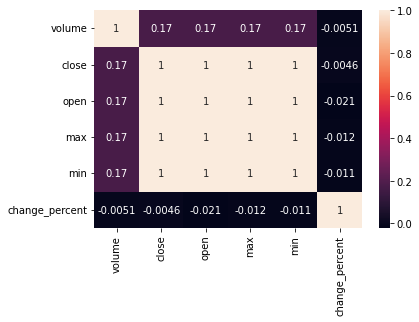

In [12]:
# Check correlation
sns.heatmap(historical_prices.corr(), annot=True)
plt.show()

In [13]:
# Due to the large correlation of variables and closing price: max, min, open can be dropped
historical_prices.drop(['max', 'min', 'open'], axis=1, inplace=True)
historical_prices.head()

,date,volume,close,change_percent
0,2014-01-01,10757,815.940002,1.240787
1,2014-01-02,12812,856.909973,5.021199
2,2014-01-03,9709,884.260010,3.191705
3,2014-01-04,14239,924.690002,4.572184
4,2014-01-05,21374,1014.739990,9.738397


As the `max, min, open` features are highly correlated, they are dropped. The `volume` and `change_percent` features can remain as they aren't.

### Analyze Twitter volume dataset

In [81]:
twitter_volume = pd.read_csv(TWEET_VOLUME_DATA)
twitter_volume.head()

,Unnamed: 0,Date,Tweet Volume
0,0,2014/04/09,8193.0
1,1,2014/04/10,15039.0
2,2,2014/04/11,14907.0
3,3,2014/04/12,7582.0
4,4,2014/04/13,10674.0


In [82]:
twitter_volume.drop(['Unnamed: 0'], axis=1, inplace=True)
twitter_volume.head()

,Date,Tweet Volume
0,2014/04/09,8193.0
1,2014/04/10,15039.0
2,2014/04/11,14907.0
3,2014/04/12,7582.0
4,2014/04/13,10674.0


In [83]:
twitter_volume.tail()

,Date,Tweet Volume
3206,2023/01/18,124969.0
3207,2023/01/19,114059.0
3208,2023/01/20,135671.0
3209,2023/01/21,134571.0
3210,2023/01/22,14847.0


In [84]:
historical_prices.tail()

,date,volume,close,change_percent
3304,2023-01-18,388670,20670.589844,-2.206940
3305,2023-01-19,275758,21081.183594,1.986367
3306,2023-01-20,373735,22677.236328,7.570983
3307,2023-01-21,382688,22775.677734,0.434098
3308,2023-01-22,379398,22847.929688,0.317233


In [85]:
filtered_prices = historical_prices[~(historical_prices['date'] < '2015-01-01')]

In [86]:
filtered_prices.head()

,date,volume,close,change_percent
365,2015-01-01,12820,314.890015,-1.052657
366,2015-01-02,14729,315.209991,0.101615
367,2015-01-03,47366,287.130005,-8.908343
368,2015-01-04,88769,264.720001,-7.804828
369,2015-01-05,54993,274.839996,3.822905


In [87]:
filtered_prices.tail()

,date,volume,close,change_percent
3304,2023-01-18,388670,20670.589844,-2.206940
3305,2023-01-19,275758,21081.183594,1.986367
3306,2023-01-20,373735,22677.236328,7.570983
3307,2023-01-21,382688,22775.677734,0.434098
3308,2023-01-22,379398,22847.929688,0.317233


In [88]:
filtered_t_volume = twitter_volume[~(twitter_volume['Date'] < '2015-01-01')]

In [89]:
filtered_t_volume.head()

,Date,Tweet Volume
267,2015/01/01,18681.0
268,2015/01/02,9385.0
269,2015/01/03,NaN
270,2015/01/04,7300.0
271,2015/01/05,23092.0


In [90]:
filtered_t_volume.tail()

,Date,Tweet Volume
3206,2023/01/18,124969.0
3207,2023/01/19,114059.0
3208,2023/01/20,135671.0
3209,2023/01/21,134571.0
3210,2023/01/22,14847.0


In [91]:
# Check for any null values
filtered_t_volume.isnull().sum()

Date             0
Tweet Volume    56
dtype: int64

In [93]:
# Since null values are few, the average can be imputed
filtered_t_volume['Tweet Volume'] = filtered_t_volume['Tweet Volume'].fillna(filtered_t_volume['Tweet Volume'].mean())

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
# Check for any null values
filtered_t_volume.isnull().sum()

Date            0
Tweet Volume    0
dtype: int64

In [95]:
filtered_t_volume['close'] = list(filtered_prices['close'])

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
filtered_t_volume.head()

,Date,Tweet Volume,close
267,2015/01/01,18681.00000,314.890015
268,2015/01/02,9385.00000,315.209991
269,2015/01/03,57489.61392,287.130005
270,2015/01/04,7300.00000,264.720001
271,2015/01/05,23092.00000,274.839996


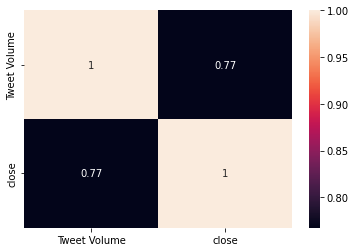

In [97]:
# Check correlation
sns.heatmap(filtered_t_volume.corr(), annot=True)
plt.show()

As there is no high correlation, `twitter volume` can be considered. (Usually, features with a correlation value of greater than `0.95` are dropped)

### Analyze block reward dataset

In [98]:
block_reward = pd.read_csv(BLOCK_REWARD_DATA)
block_reward.head()

,Unnamed: 0,Date,Block Reward Size
0,0,2010/07/17,0.00100
1,1,2010/07/18,0.01630
2,2,2010/07/19,0.00154
3,3,2010/07/20,NaN
4,4,2010/07/21,NaN


In [99]:
block_reward.drop(['Unnamed: 0'], axis=1, inplace=True)

In [100]:
block_reward.tail()

,Date,Block Reward Size
4567,2023/01/17,1.311
4568,2023/01/18,1.807
4569,2023/01/19,1.760
4570,2023/01/20,2.317
4571,2023/01/21,1.859


In [101]:
filtered_block_reward = block_reward[~(block_reward['Date'] < '2015-01-01')]

In [102]:
# For this dataset, the latest date is usually available only the following date. Therefore, add column avg value as following
# date's reward
append_br = pd.DataFrame({
    'Date': filtered_prices.tail(1)['date'].values[0],
    'Block Reward Size': block_reward['Block Reward Size'].mean()
}, index=[len(block_reward)])

In [103]:
filtered_block_reward = filtered_block_reward.append(append_br)

In [104]:
# Check for any null values
filtered_block_reward.isnull().sum()

Date                 0
Block Reward Size    0
dtype: int64

In [105]:
filtered_block_reward['close'] = list(filtered_prices['close'])

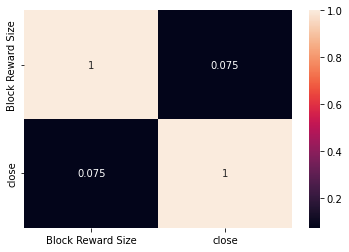

In [107]:
# Check correlation
sns.heatmap(filtered_block_reward.corr(), annot=True)
plt.show()

As there is no high correlation, `block reward size` can also be considered

### Analyze google trends dataset

In [175]:
gtrends = pd.read_csv(TRENDS_DATA)
gtrends.head()

,date,bitcoin_unscaled
0,1/1/2014,46
1,1/2/2014,50
2,1/3/2014,52
3,1/4/2014,45
4,1/5/2014,52


In [176]:
gtrends.tail()

,date,bitcoin_unscaled
3304,1/18/2023,59
3305,1/19/2023,58
3306,1/20/2023,61
3307,1/21/2023,67
3308,1/22/2023,51


In [189]:
# Certain issues popup
filtered_gtrends = gtrends[~(pd.to_datetime(gtrends['date']) < pd.to_datetime('2015-01-01'))]

In [190]:
# Check for any null values
filtered_gtrends.isnull().sum()

date                0
bitcoin_unscaled    0
dtype: int64

In [192]:
filtered_gtrends['close'] = list(filtered_prices['close'])

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


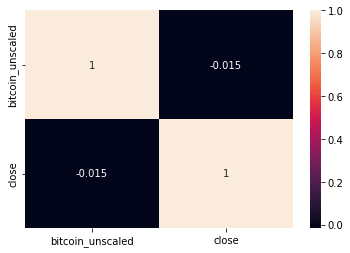

In [194]:
# Check correlation
sns.heatmap(filtered_gtrends.corr(), annot=True)
plt.show()